# Getting the models to merge in Checkpoint format


In [ ]:
!wget https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix/AbyssOrangeMix_base.ckpt

--2023-08-03 21:56:25--  https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix/AbyssOrangeMix_base.ckpt
Resolving huggingface.co (huggingface.co)... 99.84.108.87, 99.84.108.55, 99.84.108.129, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.87|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/a3/2d/a32dc75b6b955f4b9a0498061b68d02fc24b9e596c8126c9817795c3f0356c18/bbd2621f3ec4fad707f75fc032a2c2602c296180a53ed3d9897d8ca7a01dd6ed?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27AbyssOrangeMix_base.ckpt%3B+filename%3D%22AbyssOrangeMix_base.ckpt%22%3B&Expires=1691358985&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MTM1ODk4NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9hMy8yZC9hMzJkYzc1YjZiOTU1ZjRiOWEwNDk4MDYxYjY4ZDAyZmMyNGI5ZTU5NmM4MTI2Yzk4MTc3OTVjM2YwMzU2YzE4L2JiZDI2MjFmM2VjNGZhZDcwN2Y3NWZjMDMyYTJjMj

In [ ]:
!wget https://huggingface.co/hakurei/waifu-diffusion-v1-3/resolve/main/wd-v1-3-float32.ckpt

--2023-08-03 21:58:17--  https://huggingface.co/hakurei/waifu-diffusion-v1-3/resolve/main/wd-v1-3-float32.ckpt
Resolving huggingface.co (huggingface.co)... 99.84.108.55, 99.84.108.87, 99.84.108.129, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.55|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/83/8e/838e890bec8fddfdbc93ceb156ced8b290b4de1f1116c58b34d3af4c9f4fcea7/9dade826203c7ee369881b5dc20d34298fa644c1f137568e09fbc4b9a0d3e817?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27wd-v1-3-float32.ckpt%3B+filename%3D%22wd-v1-3-float32.ckpt%22%3B&Expires=1691359097&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MTM1OTA5N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy84My84ZS84MzhlODkwYmVjOGZkZGZkYmM5M2NlYjE1NmNlZDhiMjkwYjRkZTFmMTExNmM1OGIzNGQzYWY0YzlmNGZjZWE3LzlkYWRlODI2MjAzYzdlZTM2OTg4MWI1ZGMyMGQzNDI5OGZhNjQ0YzFmMTM3NTY4ZTA5ZmJjN

# Merging the models

In [ ]:
import os

import torch
from tqdm import tqdm

without_vae = True

output = "merged_model"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



model_0 = torch.load("/content/AbyssOrangeMix_base.ckpt",map_location=torch.device('cuda'))
theta_0 = model_0["state_dict"]
model_1 = torch.load("/content/wd-v1-3-float32.ckpt",map_location=torch.device('cuda'))
theta_1 = model_1
alpha = 0.7

output_file = f'{output}-{str(alpha)[2:] + "0"}.ckpt'

# check if output file already exists, ask to overwrite
if os.path.isfile(output_file):
    print("Output file already exists. Overwrite? (y/n)")
    while True:
        overwrite = input()
        if overwrite == "y":
            break
        elif overwrite == "n":
            print("Exiting...")
            exit()
        else:
            print("Please enter y or n")


for key in tqdm(theta_0.keys(), desc="Stage 1/2"):
    # skip VAE model parameters to get better results(tested for anime models)
    # for anime model，with merging VAE model, the result will be worse (dark and blurry)
    if without_vae and "first_stage_model" in key:
        continue

    if "model" in key and key in theta_1:
        theta_0[key] = (1 - alpha) * theta_0[key] + alpha * theta_1[key]

for key in tqdm(theta_1.keys(), desc="Stage 2/2"):
    if "model" in key and key not in theta_0:
        theta_0[key] = theta_1[key]

print("Saving...")

torch.save({"state_dict": theta_0}, output_file)

print("Done!")

Stage 2/2: 100%|██████████| 7/7 [00:00<00:00, 67185.65it/s]


Saving...
Done!


# Prerequisites for Inference

In [ ]:
torch.cuda.empty_cache()

In [ ]:
! pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.4 MB/s eta 0:00:00


In [ ]:
!git clone https://huggingface.co/WarriorMama777/AbyssOrangeMix

Cloning into 'AbyssOrangeMix'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), 516.88 KiB | 8.91 MiB/s, done.
Filtering content: 100% (4/4), 5.10 GiB | 41.87 MiB/s, done.


In [ ]:
!pip install diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.5 MB/s eta 0:00:00


# Inference test for the 1st Model

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

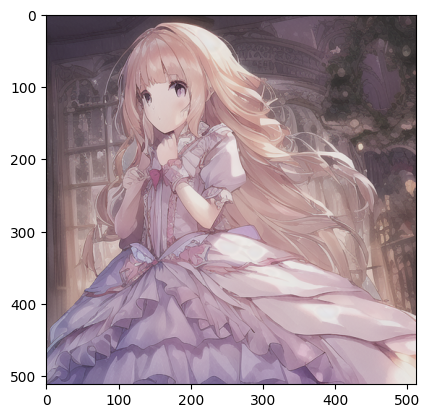

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

model_path = "/content/AbyssOrangeMix/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe("An image of a girl wearing princess clothes").images[0]
plt.imshow(image)

# Inference test for the 2nd model

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

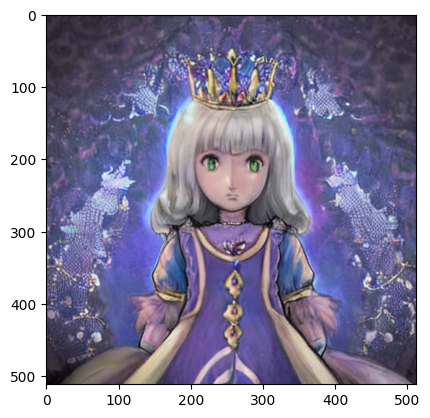

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

pipe = StableDiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float32
).to('cuda')


image = pipe("An image of a girl wearing princess clothes").images[0]
plt.imshow(image)

# Converting the merged model from checkpoint to pipeline format

In [ ]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 33046, done.
remote: Counting objects: 100% (715/715), done.
remote: Compressing objects: 100% (368/368), done.
remote: Total 33046 (delta 449), reused 498 (delta 303), pack-reused 32331
Receiving objects: 100% (33046/33046), 21.38 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (24249/24249), done.


In [ ]:
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 965.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144552 sha256=e50a703d5bd49c98e845bef61c2ae67ac910c58c2e35babc2455c6e07b1ae416
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
!wget https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-inference.yaml

--2023-08-03 22:01:21--  https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-inference.yaml
Resolving huggingface.co (huggingface.co)... 99.84.108.55, 99.84.108.70, 99.84.108.87, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1873 (1.8K) [text/plain]
Saving to: ‘v1-inference.yaml’

v1-inference.yaml   100%[===================>]   1.83K  --.-KB/s    in 0s      

2023-08-03 22:01:21 (1.29 GB/s) - ‘v1-inference.yaml’ saved [1873/1873]



In [ ]:
! python diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py --checkpoint_path "/content/merged_model-70.ckpt" --dump_path /content/Merged_Model/ --original_config_file v1-inference.yaml

2023-08-03 22:02:30.737695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


# Inference test for the merged model

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

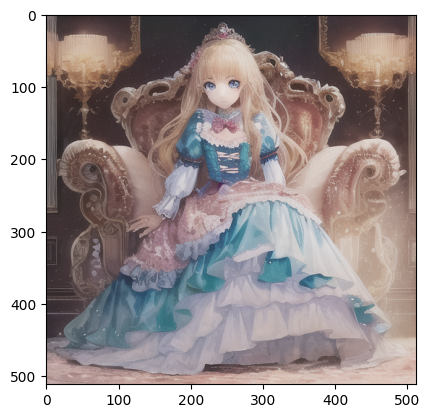

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

model_path = "/content/Merged_Model/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe("An image of a girl wearing princess clothes").images[0]
plt.imshow(image)

# Fintuning the model on the characters "Asuka Langley" from Evangelion
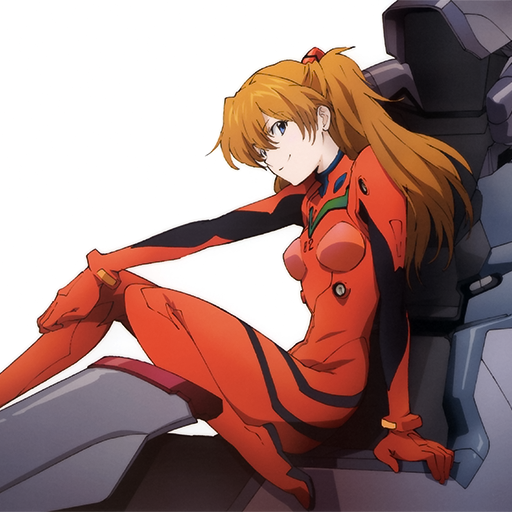

In [ ]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-9j2xwvic
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-9j2xwvic
  Resolved https://github.com/huggingface/diffusers to commit 1a8843f93ec88585df18c895f0ec3d0914df8d10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.20.0.dev0-py3-none-any.whl size=1326088 sha256=aed33251c95c5a9c9e8f4755e851c1f6b93732df51a4d610dde7eb73188072af
  Stored in directory: /tmp/pip-ephem-wheel-cache-j47sgiwy/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.19.3
    Uninstalling diffusers-0.19.3:
      Successfully uninstalled diffusers-0.19.3


# Training for text_to_image LoRA

In [ ]:
! accelerate launch --mixed_precision="fp16"  /content/diffusers/examples/text_to_image/train_text_to_image_lora.py \
  --pretrained_model_name_or_path="/content/Merged_Model" \
  --dataset_name="karanzrk/SouryuuAsukaLangley" \
  --dataloader_num_workers=8 \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=1120 \
  --learning_rate=1e-04 \
  --max_grad_norm=1 \
  --lr_scheduler="cosine" --lr_warmup_steps=0 \
  --output_dir="/content/lora_output" \
  --checkpointing_steps=500 \
  --validation_prompt="souryuuasukalangley, An image of Asuka Langley" \
  --seed=1337

2023-08-03 22:05:53.924652: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2023-08-03 22:06:00.706795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
08/03/2023 22:06:03 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'clip_sample_range', 'thresholding', 'dynamic_thresholding_ratio', 'variance_type', 'sample_max_value'} was not found in config. Values will be initialized to default values.
Extracting data files: 100% 1/1 [00:00<00:00, 489.87it/s]
Generating train s

# Inference of the image with text_to_image LoRA

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

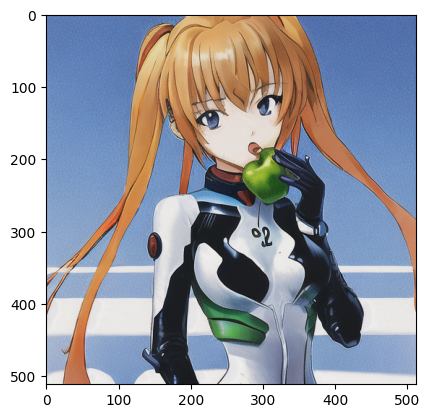

In [4]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
import matplotlib.pyplot as plt

model_path = "/content/Merged_Model/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe.unet.load_attn_procs("/content/lora_output/")
pipe.to("cuda")

image = pipe("1girl, image of girl eating apple, plugsuit 02",num_inference_steps=50, guidance_scale=7.5, cross_attention_kwargs={"scale": 0.8}).images[0]
plt.imshow(image)

# Inference of the image without the LoRA

Note: It is noticable that the image generated with the LoRA successfully recreates the character's features while the one without LoRA is not able to do that

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

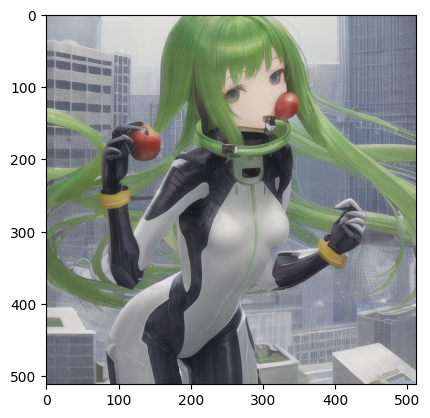

In [5]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

model_path = "/content/Merged_Model/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe("1girl, image of girl eating apple, plugsuit 02").images[0]
plt.imshow(image)

# Bonus Inference

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

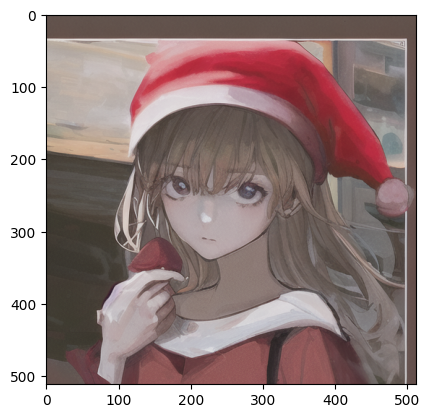

In [8]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
import matplotlib.pyplot as plt

model_path = "/content/Merged_Model/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe.unet.load_attn_procs("/content/lora_output/")
pipe.to("cuda")

image = pipe("1girl, image of girl wearing a red hat",num_inference_steps=50, guidance_scale=7.5, cross_attention_kwargs={"scale": 0.8}).images[0]
plt.imshow(image)

# Training for Dreambooth LoRA (2nd Technique)

Dreambooth LoRA is the 2nd technique provided in the huggingface documentation, this method however does not support text to image training

In [4]:
! wget https://huggingface.co/datasets/onko/SouryuuAsukaLangley/resolve/main/SouryuuAsukaLangleyFinal.zip

--2023-08-03 23:33:33--  https://huggingface.co/datasets/onko/SouryuuAsukaLangley/resolve/main/SouryuuAsukaLangleyFinal.zip
Resolving huggingface.co (huggingface.co)... 99.84.108.129, 99.84.108.55, 99.84.108.87, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.129|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/4e/46/4e46250f4d14f110e5069faf97c65c09ea169ce3f5f82e1ec456302b42c75b6d/0ed848fa70aa13cf477dad1ffbb07735ed51c8a4f1f7a9dd8dfba2ef13f21c94?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27SouryuuAsukaLangleyFinal.zip%3B+filename%3D%22SouryuuAsukaLangleyFinal.zip%22%3B&response-content-type=application%2Fzip&Expires=1691364813&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MTM2NDgxM319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy80ZS80Ni80ZTQ2MjUwZjRkMTRmMTEwZTUwNjlmYWY5N2M2NWMwOWVhMTY5Y2UzZjVmODJlMWVjNDU2MzAyYjQyYzc1YjZkLzB

In [5]:
! unzip SouryuuAsukaLangleyFinal.zip -d /content/images/

Archive:  SouryuuAsukaLangleyFinal.zip
  inflating: /content/images/Souryuu.Asuka.Langley.full.2042504.png  
  inflating: /content/images/Souryuu.Asuka.Langley.full.2042504.txt  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3258070.png  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3258070.txt  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3275170.png  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3275170.txt  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3276063.png  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3276063.txt  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3376328.png  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3376328.txt  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3442852.png  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3442852.txt  
  inflating: /content/images/Souryuu.Asuka.Langley.full.3477407.png  
  inflating: /content/images/Souryuu.Asuka.Langley.

In [9]:
! rm -rf /content/images/*.txt

In [1]:
! accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path="/content/Merged_Model"  \
  --instance_data_dir="/content/images/" \
  --output_dir="/content/Dreambooth_LoRA" \
  --instance_prompt="An image of a girl" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --checkpointing_steps=100 \
  --learning_rate=1e-4 \
  --train_text_encoder \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1120 \
  --validation_prompt="image of a girl in plugsuit 02" \
  --validation_epochs=50 \
  --seed="66233"

2023-08-03 23:41:16.242422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2023-08-03 23:41:25.517907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
08/03/2023 23:41:28 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'clip_sample_range', 'dynamic_thresholding_rati

# Inference of the image with Dreambooth LoRA

While the LoRA does infact recreate the character's features, it does so with less detail probably due to the lack of any textual training

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

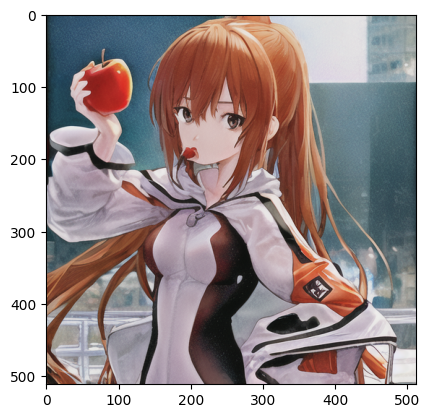

In [7]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
import matplotlib.pyplot as plt

model_path = "/content/Merged_Model/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe.unet.load_attn_procs("/content/Dreambooth_LoRA/")
pipe.to("cuda")

image = pipe("1girl, image of girl eating apple, plugsuit 02",num_inference_steps=50, guidance_scale=7.5, cross_attention_kwargs={"scale": 0.8}).images[0]
plt.imshow(image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

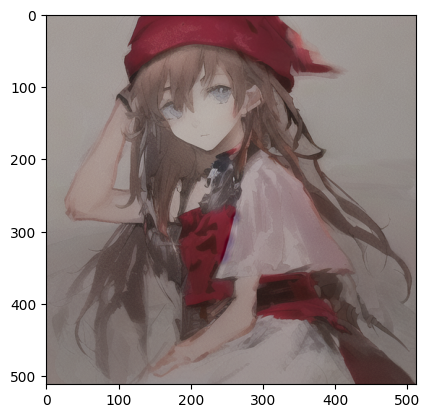

In [4]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
import matplotlib.pyplot as plt

model_path = "/content/Merged_Model/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe.unet.load_attn_procs("/content/Dreambooth_LoRA/")
pipe.to("cuda")

image = pipe("1girl, image of girl wearing a red hat",num_inference_steps=50, guidance_scale=7.5, cross_attention_kwargs={"scale": 0.8}).images[0]
plt.imshow(image)